## Лабораторная работа № 4 Салим Ногорбеков

In [210]:
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

<h1><font color="green">Изучите данные</font></h1>

### Load the digits datasets for digit recognition

In [59]:
digits_dataset = load_digits()
wine_dataset = load_wine()
cancer_dataset = load_breast_cancer()

# №1 DIGITS_DATASET:

### Dataset statistics

In [157]:
print(f"Number of images: {len(digits_dataset.data)}")
print(f"Number of features (pixels in the image): {digits_dataset.data.shape[1]}")
print(f"Unique labels (classes): {len(set(digits_dataset.target))}")

Number of images: 1797
Number of features (pixels in the image): 64
Unique labels (classes): 10


### Description of Digits Dataset

In [158]:
print(digits_dataset['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### Image visualization

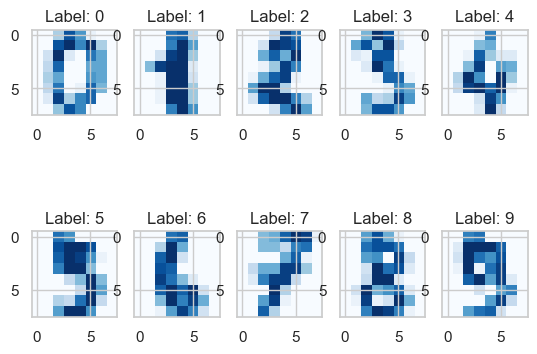

In [243]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits_dataset.images[i], cmap=plt.cm.Blues, interpolation='nearest')
    plt.title(f"Label: {digits_dataset.target[i]}")
plt.show()

### Target Names

In [167]:
print(digits_dataset['target_names'])

[0 1 2 3 4 5 6 7 8 9]


# №2 WINE_DATASET:

### Description of Wine Dataset

In [159]:
print(wine_dataset['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

### Dataset dimension

In [161]:
print(wine_dataset['data'].shape)

(178, 13)


### Feature names

In [48]:
feature_names = wine_dataset.feature_names
print(feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


### Class names

In [49]:
target_names = wine_dataset.target_names
print(target_names)

['class_0' 'class_1' 'class_2']


# №3 CANCER_DATASET:

### Description of Cancer Dataset

In [76]:
print(cancer_dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### Dataset dimension

In [162]:
print(cancer_dataset['data'].shape)

(569, 30)


### Feature names

In [77]:
print(cancer_dataset['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### The first few records in the dataset

In [82]:
cancer_data = pd.DataFrame(cancer_dataset.data, columns=cancer_dataset.feature_names)
print(cancer_data.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

<h1><font color="green">Разделите данные на обучающий и тестовые наборы</font></h1>

### Digits Dataset

In [246]:
X_train, X_test, y_train, y_test = train_test_split(digits_dataset['data'], digits_dataset['target'], random_state=10)

### Wine Dataset

In [245]:
W_X_train, W_X_test, W_y_train, W_y_test = train_test_split(wine_dataset['data'], wine_dataset['target'], random_state=10)

### Cancer Dataset

In [227]:
X_training, X_testing, y_training, y_testing = train_test_split(cancer_dataset['data'], cancer_dataset['target'], random_state=10)

<h1><font color="green">Исследуйте данные с помощью визуализации. Подберите нужные параметры графиков</font></h1>

### Displaying the first 10 images from Digits Dataset

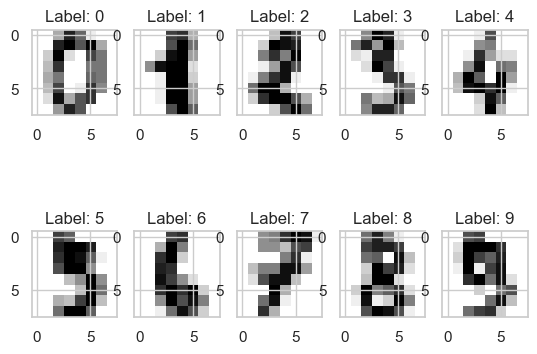

In [244]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits_dataset.images[i], cmap=plt.cm.gray_r)
    plt.title(f"Label: {digits_dataset.target[i]}")

plt.show()

### Distribution of numbers in Digits Dataset

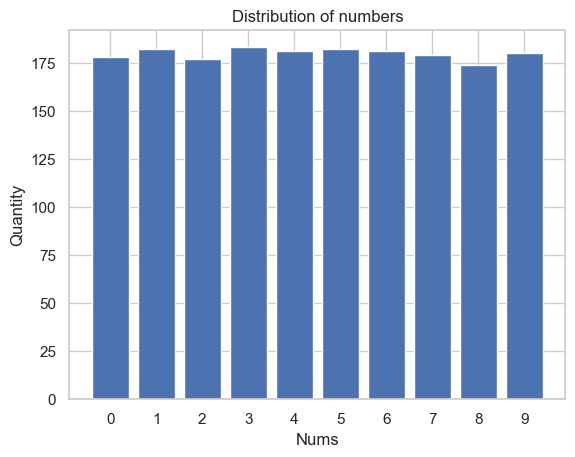

In [213]:
unique, counts = np.unique(digits_dataset.target, return_counts=True)

plt.bar(unique, counts)
plt.xlabel("Nums")
plt.ylabel("Quantity")
plt.title("Distribution of numbers")
plt.xticks(unique)
plt.show()

### Histograms for Wine Dataset

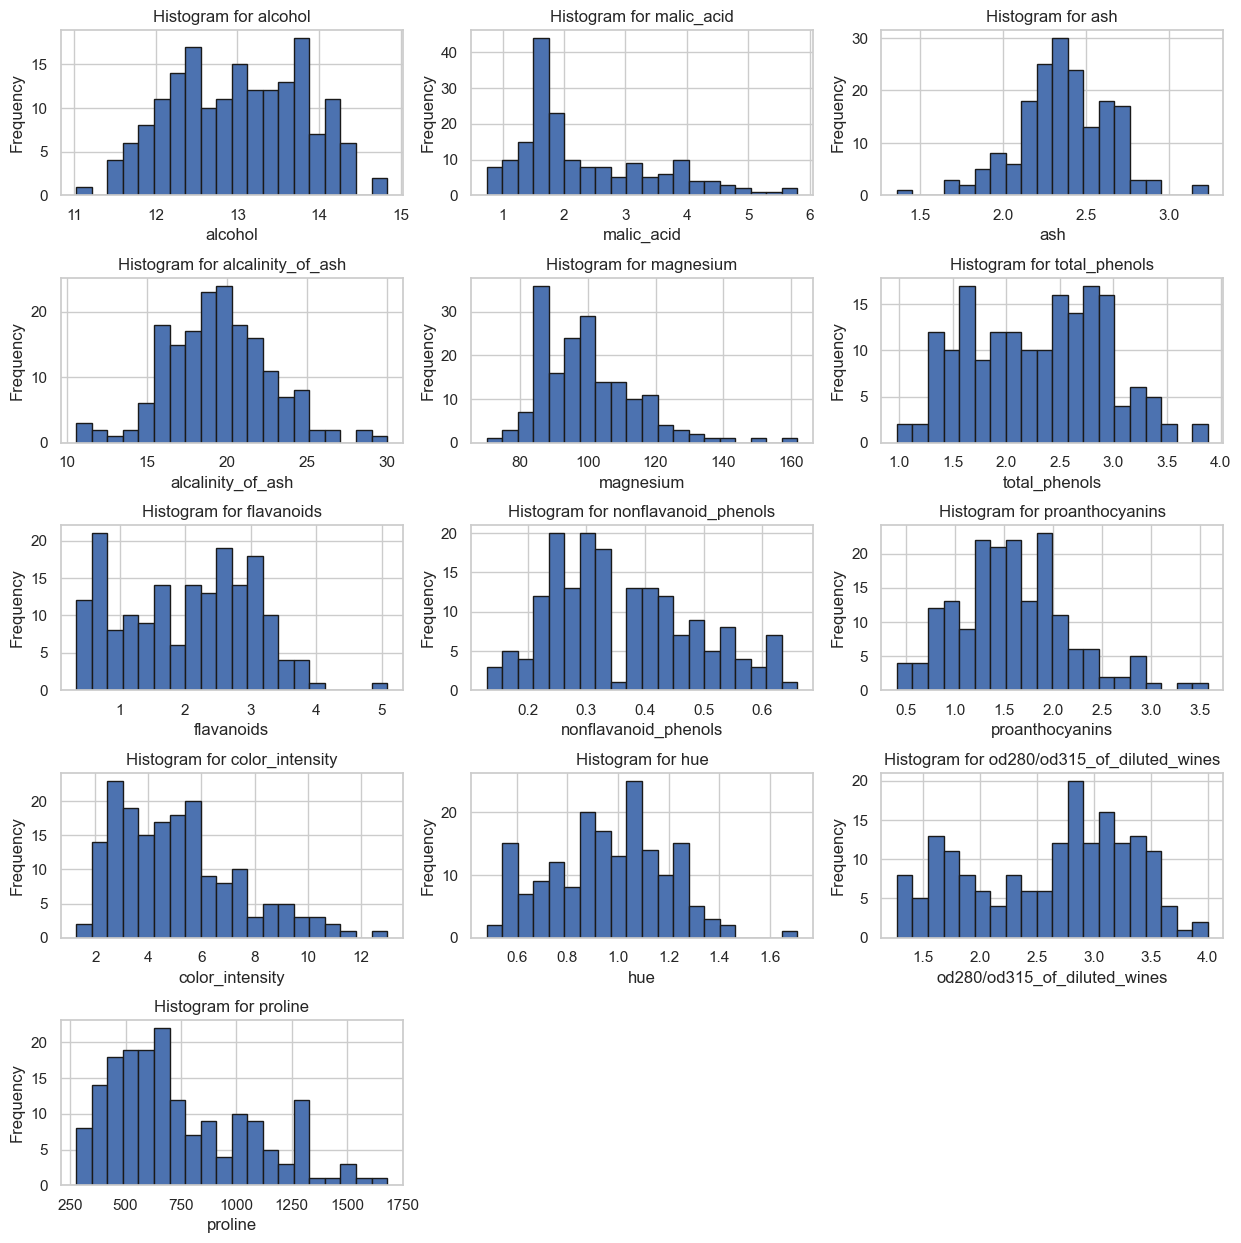

In [94]:
data = wine_dataset.data
feature_names = wine_dataset.feature_names

num_features = len(feature_names)
fig, axes = plt.subplots(nrows=num_features // 3 + 1, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

for i, ax in enumerate(axes.flat):
    if i < num_features:
        ax.hist(data[:, i], bins=20, edgecolor='k')
        ax.set_xlabel(feature_names[i])
        ax.set_ylabel("Frequency")
        ax.set_title(f"Histogram for {feature_names[i]}")
    else:
        fig.delaxes(ax)

plt.show()

### Pie chart for breast Cancer Dataset

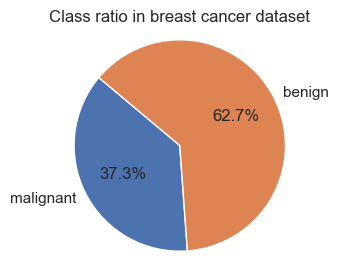

In [95]:
target_names = cancer_dataset.target_names
class_counts = [sum(cancer_dataset.target == i) for i in range(len(target_names))]

plt.figure(figsize=(3, 3))
plt.pie(class_counts, labels=target_names, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Class ratio in breast cancer dataset")
plt.show()

### Histogram for each feature

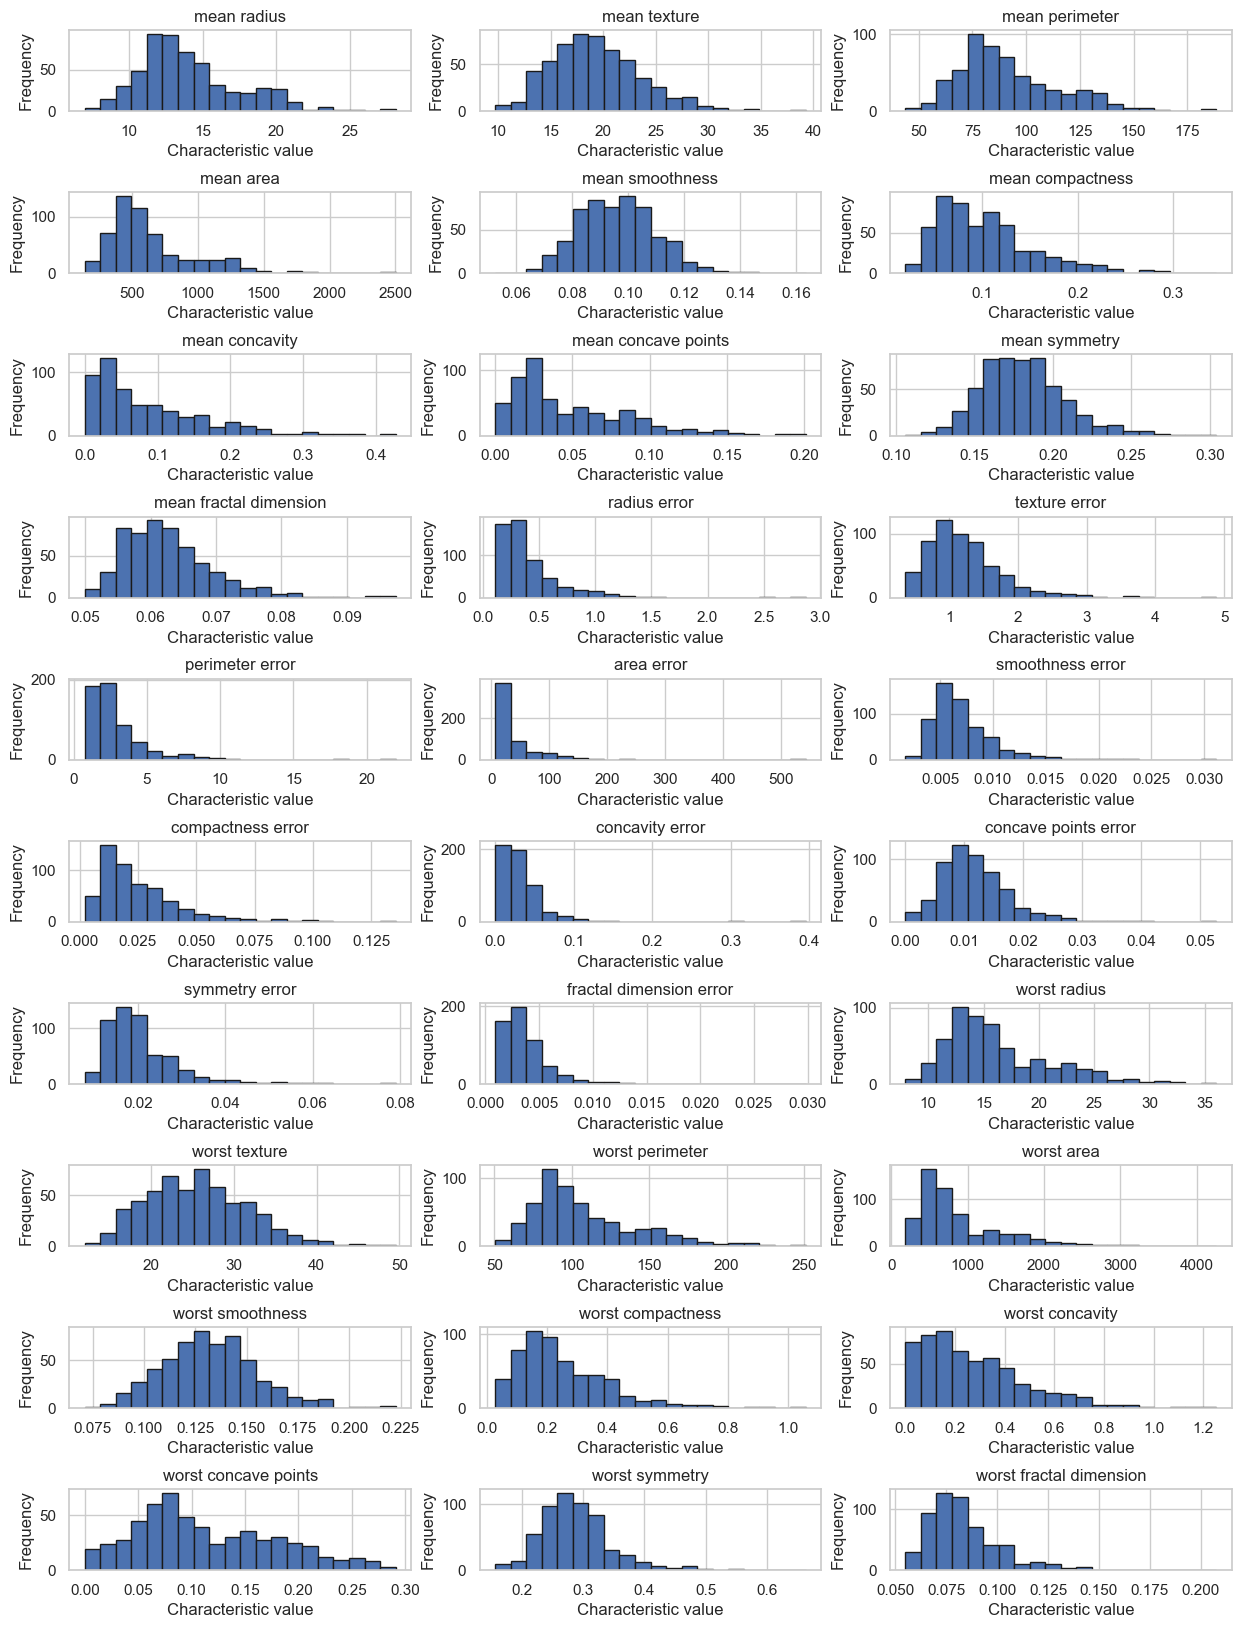

In [218]:
data = cancer_dataset.data
feature_names = cancer_dataset.feature_names
num_features = data.shape[1]

num_rows = num_features // 3
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
fig.subplots_adjust(hspace=1)

for i, ax in enumerate(axes.ravel()):
    if i < num_features:
        ax.hist(data[:, i], bins=20, edgecolor='k')
        ax.set_title(f"{feature_names[i]}")
        ax.set_xlabel("Characteristic value")
        ax.set_ylabel("Frequency")

for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.ravel()[i])

plt.show()


<h1><font color="green">Постройте модель по методу k-ближайших средних. Протестируйте на произвольном наборе данных</font></h1>

### Digits Dataset

In [247]:
X = digits_dataset.data
y = digits_dataset.target

knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train, y_train)

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)

knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train, y_train)

knn15 = KNeighborsClassifier(n_neighbors=15)
knn15.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

### Wine Dataset

In [248]:
w_x = wine_dataset.data
w_y = wine_dataset.target

w_knn2 = KNeighborsClassifier(n_neighbors=2)
w_knn2.fit(W_X_train, W_y_train)

w_knn5 = KNeighborsClassifier(n_neighbors=5)
w_knn5.fit(W_X_train, W_y_train)

w_knn10 = KNeighborsClassifier(n_neighbors=10)
w_knn10.fit(W_X_train, W_y_train)

w_knn15 = KNeighborsClassifier(n_neighbors=15)
w_knn15.fit(W_X_train, W_y_train)

KNeighborsClassifier(n_neighbors=15)

### Cancer Dataset

In [249]:
с_knn2 = KNeighborsClassifier(n_neighbors=2)
с_knn2.fit(X_training, y_training)

с_knn5 = KNeighborsClassifier(n_neighbors=5)
с_knn5.fit(X_training, y_training)

с_knn10 = KNeighborsClassifier(n_neighbors=10)
с_knn10.fit(X_training, y_training)

с_knn15 = KNeighborsClassifier(n_neighbors=15)
с_knn15.fit(X_training, y_training)

KNeighborsClassifier(n_neighbors=15)

<h1><font color="green">Получите прогноз модели и оценку качества</font></h1>

### Predictions and Correctness for Digits Dataset

In [250]:
y_pred2 = knn2.predict(X_test)
y_pred5 = knn5.predict(X_test)
y_pred10 = knn10.predict(X_test)
y_pred15 = knn15.predict(X_test)

print("Predictions for 2 Neighbors:")
print(y_pred2)
print("Correctness:" + str(knn2.score(X_test, y_test)))
print("Predictions for 5 Neighbors:")
print(y_pred5)
print("Correctness:" + str(knn5.score(X_test, y_test)))
print("Predictions for 10 Neighbors:")
print(y_pred10)
print("Correctness:" + str(knn10.score(X_test, y_test)))
print("Predictions for 15 Neighbors:")
print(y_pred15)
print("Correctness:" + str(knn15.score(X_test, y_test)))

Predictions for 2 Neighbors:
[5 2 5 4 8 2 4 3 3 0 8 7 0 1 8 6 9 7 9 7 1 8 6 7 8 8 5 3 5 9 3 3 7 3 4 1 9
 2 5 4 2 1 0 9 2 3 6 1 9 4 4 3 8 4 8 5 9 7 1 0 4 5 8 4 7 9 0 7 1 3 9 3 3 8
 0 7 3 6 5 2 0 8 8 0 1 1 2 8 8 8 2 6 3 4 7 9 8 2 9 2 5 0 8 0 4 8 8 0 6 7 3
 3 9 1 5 4 6 0 8 8 1 1 7 9 9 5 2 3 3 4 7 6 2 5 4 3 2 7 6 7 2 7 4 9 5 1 9 4
 6 1 1 1 4 0 4 9 1 2 3 5 0 3 4 1 5 4 9 3 5 6 4 0 8 6 7 0 9 9 4 7 3 5 2 0 6
 7 5 3 9 7 1 3 2 8 3 3 1 7 1 1 1 7 1 6 7 6 9 5 2 3 5 2 9 5 4 8 2 9 1 5 0 2
 3 9 0 2 0 2 1 0 5 0 6 4 2 1 9 0 9 0 6 9 4 4 9 7 5 6 1 3 7 0 8 6 2 0 1 2 3
 8 4 4 3 5 7 9 7 2 0 2 0 9 2 8 6 3 6 0 6 6 6 7 1 6 1 7 6 0 6 3 7 4 6 2 8 0
 8 4 7 3 3 0 0 2 3 9 7 4 6 7 9 7 6 0 5 6 2 7 1 0 5 1 6 4 7 2 5 1 4 6 6 5 0
 2 9 8 7 9 6 7 0 8 3 5 9 4 1 5 5 4 7 3 9 2 7 3 3 6 6 3 2 1 9 1 3 0 8 7 0 4
 2 1 1 2 9 8 5 1 7 9 8 7 5 4 2 5 5 4 2 4 6 5 0 8 2 0 6 6 3 6 5 3 0 9 7 1 6
 7 4 7 3 2 5 2 1 2 6 8 0 1 9 7 6 9 9 2 9 1 0 9 9 8 3 6 1 1 3 0 6 8 3 2 0 3
 4 5 5 8 8 6]
Correctness:0.9866666666666667
Predictions for 5 Neighbor

### Predictions and Correctness for Wine Dataset

In [251]:
w_y_pred2 = w_knn2.predict(W_X_test)
w_y_pred5 = w_knn5.predict(W_X_test)
w_y_pred10 = w_knn10.predict(W_X_test)
w_y_pred15 = w_knn15.predict(W_X_test)

print("Predictions for 2 Neighbors:")
print(w_y_pred2)
print("Correctness: "+ str(w_knn2.score(W_X_test, W_y_test)))
print("Predictions for 5 Neighbors:")
print(w_y_pred5)
print("Correctness: "+ str(w_knn5.score(W_X_test, W_y_test)))
print("Predictions for 10 Neighbors:")
print(w_y_pred10)
print("Correctness: "+ str(w_knn10.score(W_X_test, W_y_test)))
print("Predictions for 15 Neighbors:")
print(w_y_pred15)
print("Correctness: "+ str(w_knn15.score(W_X_test, W_y_test)))

Predictions for 2 Neighbors:
[0 1 0 1 0 1 1 0 1 0 2 1 0 1 1 1 1 0 2 0 0 1 0 0 1 1 0 1 0 1 1 1 0 2 1 0 0
 1 2 0 1 2 0 1 0]
Correctness: 0.5777777777777777
Predictions for 5 Neighbors:
[2 1 0 1 0 1 1 2 2 0 2 1 0 1 1 2 2 2 2 2 0 2 0 0 1 2 2 2 2 1 1 2 0 2 1 0 0
 1 2 1 1 2 2 1 0]
Correctness: 0.6888888888888889
Predictions for 10 Neighbors:
[2 1 2 1 0 1 1 2 2 0 2 1 0 1 1 1 1 2 2 2 0 1 0 0 1 2 2 2 2 1 1 1 0 2 1 0 0
 1 2 2 1 2 2 1 0]
Correctness: 0.6444444444444445
Predictions for 15 Neighbors:
[2 1 2 1 0 1 1 2 2 0 0 1 0 1 1 1 1 2 2 2 0 2 0 0 1 2 2 2 2 1 1 1 0 2 1 0 0
 1 0 2 1 2 0 1 0]
Correctness: 0.6888888888888889


### Predictions and Correctness for Cancer Dataset

In [252]:
c_y_pred2 = с_knn2.predict(X_testing)
c_y_pred5 = с_knn5.predict(X_testing)
c_y_pred10 = с_knn10.predict(X_testing)
c_y_pred15 = с_knn15.predict(X_testing)

print("Predictions for 2 Neighbors:")
print(c_y_pred2)
print("Correctness: "+ str(с_knn2.score(X_testing, y_testing)))
print("Predictions for 5 Neighbors:")
print(c_y_pred5)
print("Correctness: "+ str(с_knn5.score(X_testing, y_testing)))
print("Predictions for 10 Neighbors:")
print(c_y_pred10)
print("Correctness: "+ str(с_knn10.score(X_testing, y_testing)))
print("Predictions for 15 Neighbors:")
print(c_y_pred15)
print("Correctness: "+ str(с_knn15.score(X_testing, y_testing)))

Predictions for 2 Neighbors:
[0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0]
Correctness: 0.9090909090909091
Predictions for 5 Neighbors:
[0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0]
Correctness: 0.9300699300699301
Predictions for 10 Neighbors:
[0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 

<h1><font color="green">Сделайте выводы по качеству моделей</font></h1>

## Digits Dataset

<h7> Говоря о датасете в общем, размер и стиль каждой цифры могут варьироваться, и некоторые изображения могут быть более четкими и легко узнаваемыми, чем другие(это видно из визуализации изображений). Из диаграммы мы также видим, что количество примеров для каждой цифры равномерно распределено, и нет явных дисбалансов. Общее качество модели хорошее. Мы можем наблюдать, что увеличение соседей не дает лучший результат, но наивысший показатель(98.6%) был достигнут при количестве соседей 2 и 5. Соответственно вывод - модель правильно классифицировала большинство цифр.
</h7>

## Wine Dataset

<h7>Из гистограммы распределения значений мы выяснили полезные вещи, а именно: Разнообразие форм(мы можем заметить скос или же нормальное распределение), Важность признаков(мы можем увидеть какие признаки имеют большую или меньшую вариативность) и также просто анализ, который помог лучше понять характеристики данных. Что касается результатов, то наивысший был достигнут при количестве соседей = 5 и 15. Судя по увеличению соседей мы видим, что значения никак не улучшаются, они разбросаны. Это говорит нам о плохой совместимости с этой моделью
</h7>

## Breast Cancer Dataset

<h7>Во-первых мы узнали, что классы несбалансированны(это видно из круговой диаграммы), что типично для датасетов, связанных с диагностикой рака. Во-вторых, у некоторых классов имеется схожий диапазон значений. Из первых записей датасета также можно увидеть, что "mean radius" измеряется в миллиметрах, в то время как "mean area" измеряется в квадратных миллиметрах. Это означает, что при работе с этими данными, возможно, потребуется стандартизация или нормализация признаков. Наивысший результат был достигнут при количестве соседей = 5 и 10. В начале и в конце результат ниже, это можно списать на то, что классы несбалансированны</h7>